In [1]:
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister
from qiskit.quantum_info import Statevector, state_fidelity
from qiskit_ibm_runtime.fake_provider import FakeHanoiV2
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import pickle
import numpy as np


In [2]:
from utils import *
from teleport import *

In [3]:
#No. of Qubits

n = 2

In [4]:
#Prepare state to teleport

psi_nq = state_prep(n)

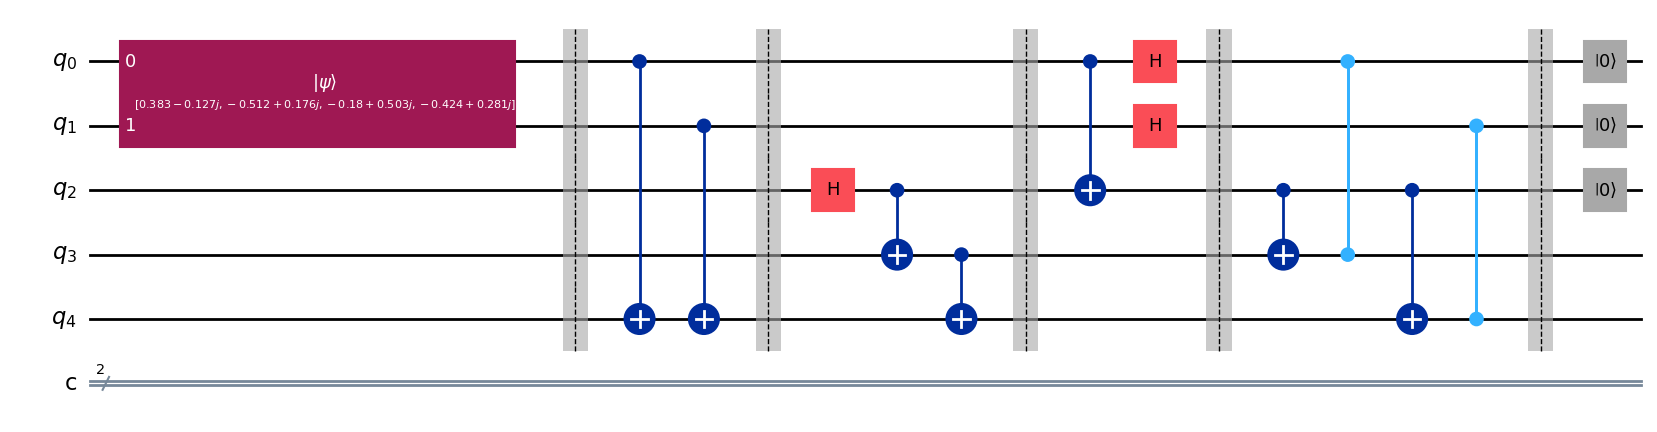

In [5]:
#Run teleportation circuit

qca, ca = teleportation_circuit(n, psi_nq)

qca.draw('mpl')

In [ ]:
#Run checker circuit

qcb, cb = checker_circuit(n, psi_nq)

qcb.draw('mpl')

In [6]:
sva = Statevector.from_instruction(qca)
#sva
sv = extract_state(sva)
sv, psi_nq

(array([ 0.38296054-0.1271305j , -0.5116541 +0.17626007j,
        -0.1798702 +0.50282821j, -0.42427223+0.28129186j]),
 array([ 0.38296054-0.1271305j , -0.5116541 +0.17626007j,
        -0.1798702 +0.50282821j, -0.42427223+0.28129186j]))

In [ ]:
#Save the statevector for both the circuits before measurement

sva = Statevector.from_instruction(qca)
svb = Statevector.from_instruction(qcb)

In [ ]:
#Measure the state obtained for respective circuit

qca.measure(range(n + 1, 2 * n + 1), ca)
qcb.measure(range(n + 1, 2 * n + 1), cb)

In [ ]:
#Load the simulator
backend = FakeHanoiV2()

#Load the backend
"""from qiskit_ibm_runtime import QiskitRuntimeService, Batch

service = QiskitRuntimeService()
backend = service.least_busy(simulator=False, operational=True)"""

In [ ]:
#Job for Teleportation circuit

joba = simulate(qca, backend)

In [ ]:
#Count for Teleportation circuit

counta = get_result(joba, n)

In [ ]:
#Job list for Checker circuit

jobb = simulate(qcb, backend)

In [ ]:
#Count for Checker circuit

countb = get_result(jobb, n)

In [ ]:
#Check fidelity of the counts obtained by the Quantum computer

fdlty = calc_fdlty(counta, countb) 

#Check Fidelity of state obtained post teleportation and one before it

state_fdlty = state_fidelity(extract_state(sva), extract_state(svb))
fdlty, state_fdlty

In [ ]:
# Save variables to a file
with open('Variables.pkl', 'wb') as f:
    pickle.dump({'counta': counta, 'countb': countb, 'fdlty': fdlty, 'state_fdlty' : state_fdlty, 'n' : n}, f)
